In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import numpy as np

### 1. Cross-Validation

In [16]:
report_files = glob.glob('report_files/cross_validation_report_base*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_base_08222107.json


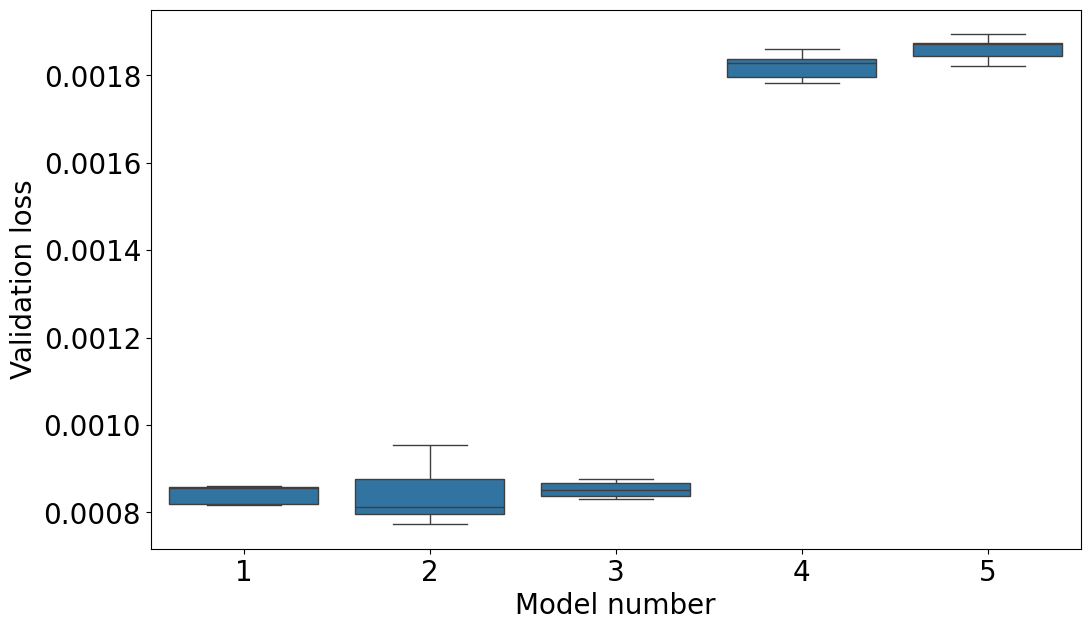

In [17]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[0].replace('architecture=', ''),  
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data.items()
    for loss in details['val_losses']
])

df_sorted = df.sort_values('mean_val_loss')

unique_models = df_sorted['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

df_sorted['model'] = df_sorted['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

sns.boxplot(x='model', y='val_loss', data=df_sorted)

plt.xlabel('Model number', fontsize=20)
plt.ylabel('Validation loss', fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  

plt.show()

In [7]:
report_files = glob.glob('report_files/cross_validation_report_fine*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data_fine = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_fine_08231130.json


/var/folders/9g/qxrpq3xx3fzcryv3rjsw2scr0000gn/T/ipykernel_42776/587579121.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['model'] = df_top['model'].map(model_mapping)


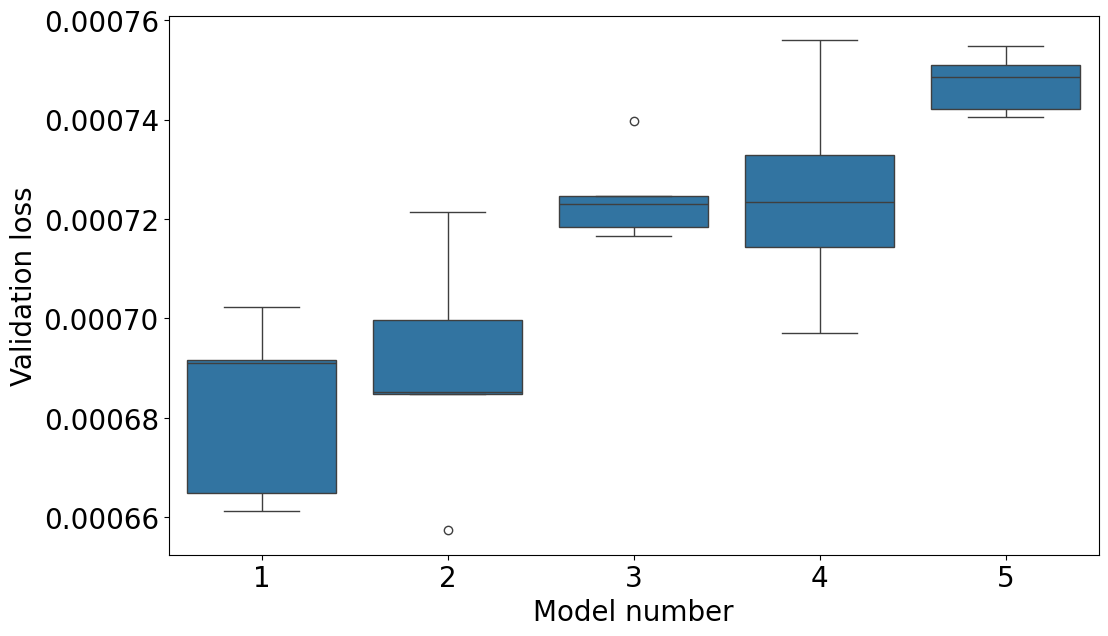

In [13]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[1].replace('optimiser_params=', ''), 
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data_fine.items()
    for loss in details['val_losses']
])

df_sorted = df.sort_values('mean_val_loss')

top_models = df_sorted['model'].unique()[:5]

df_top = df_sorted[df_sorted['model'].isin(top_models)]

unique_models = df_top['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

df_top['model'] = df_top['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

sns.boxplot(x='model', y='val_loss', data=df_top)

plt.xlabel('Model number', fontsize=20)
plt.ylabel('Validation loss', fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20) 

plt.show()

In [6]:
table_data = []

for i, (key, value) in enumerate(data.items(), start=1):
    architecture_str, optimiser_params_str = key.split('], optimiser_params=')
    architecture_str = architecture_str.replace('architecture=', '')
    optimiser_params_str = optimiser_params_str.strip('{}')
    
    optimiser_params = eval("{" + optimiser_params_str + "}")
    
    row = {
        'combination_id': i,
        'layer_configuration': architecture_str,
        'optimiser': optimiser_params['optimiser'],
        'learning_rate': optimiser_params['learning_rate'],
        'batch_size': optimiser_params['batch_size'],
        'scheduler_params': optimiser_params['scheduler_params'],
        'weight_decay': optimiser_params['weight_decay'],
        'mean_val_loss': value['mean_val_loss'],
        'stdv_val_loss': value['stdv_val_loss']
    }
    
    table_data.append(row)

df = pd.DataFrame(table_data)

df_sorted = df.sort_values(by='mean_val_loss')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)    

df_sorted

,combination_id,layer_configuration,optimiser,learning_rate,batch_size,scheduler_params,weight_decay,mean_val_loss,stdv_val_loss
0,1,"[{'type': 'transformer_encoder', 'num_heads': ...",adam,0.0001,64,None,0.0,0.000842,0.000020
2,3,"[{'type': 'transformer_encoder', 'num_heads': ...",adam,0.0001,64,None,0.0,0.000843,0.000066
1,2,"[{'type': 'transformer_encoder', 'num_heads': ...",adam,0.0001,64,None,0.0,0.000853,0.000018
3,4,"[{'type': 'lstm', 'units': 128, 'return_sequen...",adadelta,1.0000,64,None,0.0,0.001821,0.000028
4,5,"[{'type': 'lstm', 'units': 64, 'return_sequenc...",adadelta,1.0000,64,None,0.0,0.001861,0.000026


### 2. Final Model Trainining

In [9]:
report_files = glob.glob('report_files/final_training_report_*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/final_training_report_08242130.json


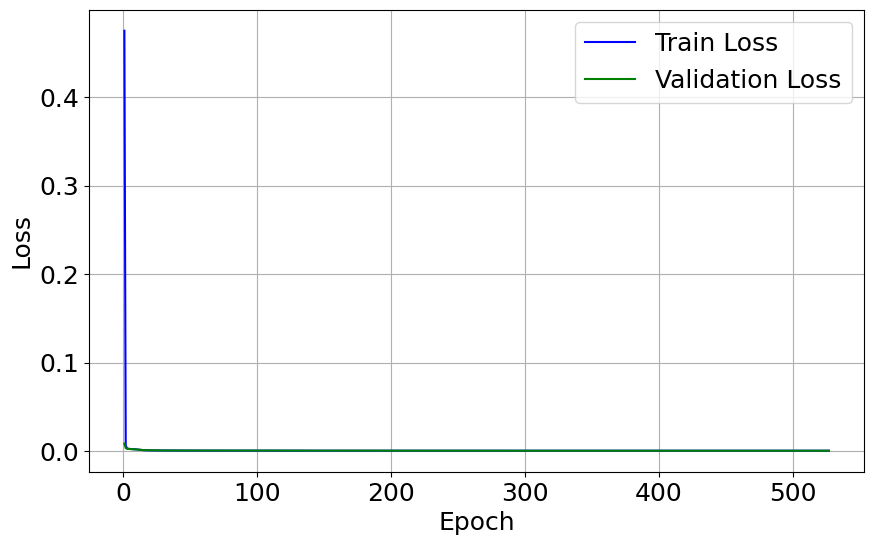

In [10]:
train_losses = data['train_losses_epoch']
val_losses = data['val_losses']
epochs = list(range(1, len(train_losses) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, linestyle='-', color='green', label='Validation Loss')
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.grid(True)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.show()

#### 2.1 Zoom in to epoch 2-100

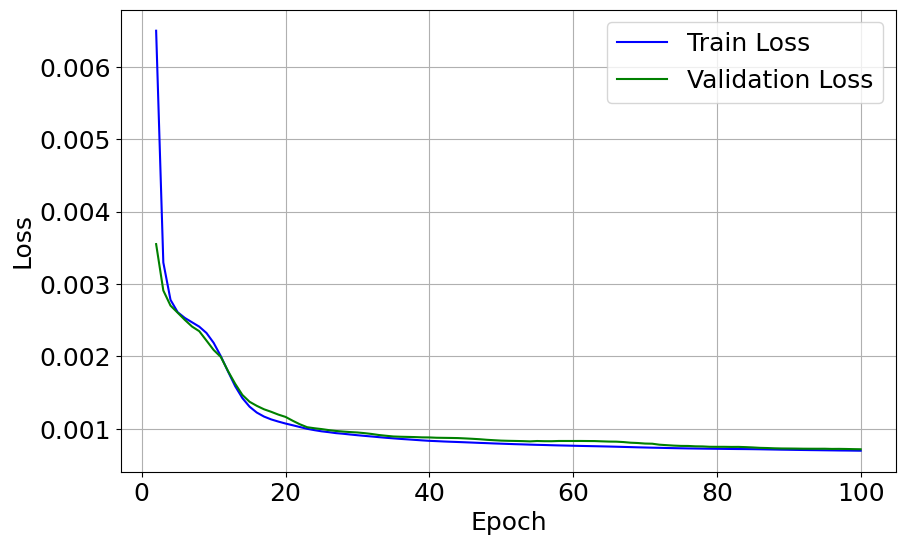

In [11]:
train_losses = data['train_losses_epoch'][1:100] 
val_losses = data['val_losses'][1:100]  
epochs = list(range(2, len(train_losses) + 2))  

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, linestyle='-', color='green', label='Validation Loss')
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.grid(True)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
plt.show()

In [10]:
with open('report_files/inference_results.json', 'r') as file:
    inferences = json.load(file)

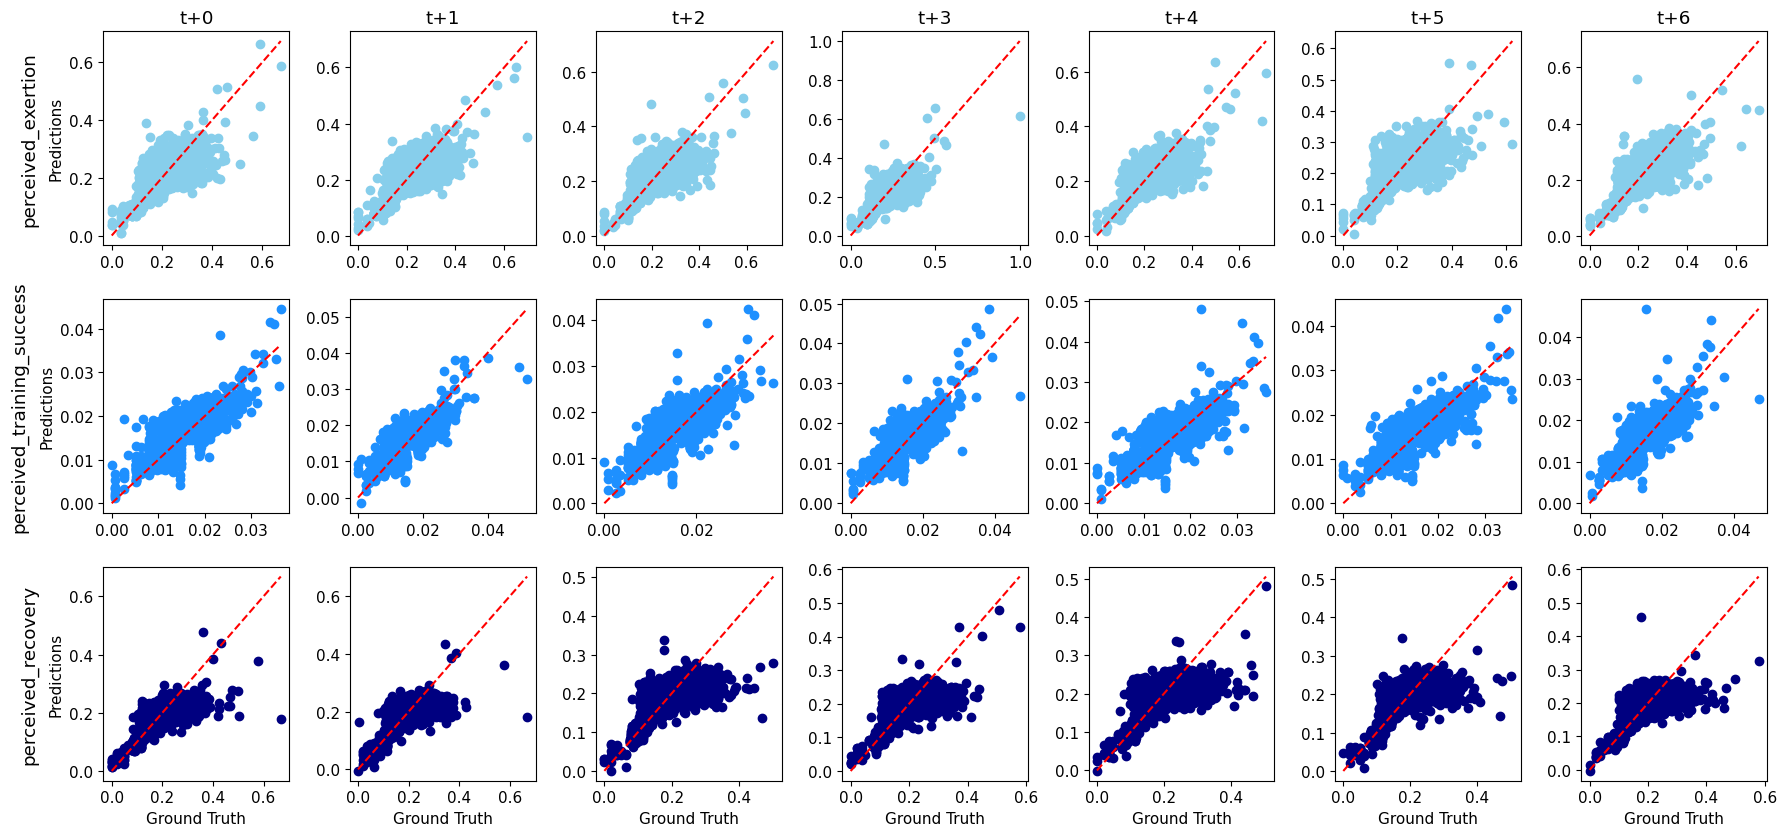

In [11]:
predictions = np.array(inferences['predictions'])  
ground_truth = np.array(inferences['ground_truth'])  

colors = ['skyblue', 'dodgerblue', 'navy']

row_labels = ['perceived_exertion', 'perceived_training_success', 'perceived_recovery', ]

plt.rcParams.update({'font.size': 11}) 
plt.figure(figsize=(20, 10))

for i in range(3):  
    for j in range(7): 
        ax = plt.subplot(3, 7, i * 7 + j + 1)
        ground_truth_day_var = ground_truth[:, j, i]
        predictions_day_var = predictions[:, j, i]
        plt.scatter(ground_truth_day_var, predictions_day_var, color=colors[i], label=f'Variable {i + 1}')
        plt.plot([min(ground_truth_day_var), max(ground_truth_day_var)], 
                 [min(ground_truth_day_var), max(ground_truth_day_var)], 
                 'r--')
        if i == 0:
            plt.title(f't+{j}')
        if j == 0:
            ax.set_ylabel('Predictions')
            ax.annotate(row_labels[i], xy=(-0.5, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                        xycoords=ax.yaxis.label, textcoords='offset points',
                        size='large', ha='center', va='center', rotation=90)
        if i == 2:
            plt.xlabel('Ground Truth')

plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])  
plt.show()